In [974]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score



In [975]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [976]:
# --- 1. Análise exploratória ---
print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações gerais:")
print(df.info())

Primeiras linhas do dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [977]:
# Converter a coluna TotalCharges para numérica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar valores ausentes(missing)
print("\nValores ausentes:")
print(df.isnull().sum())


Valores ausentes:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


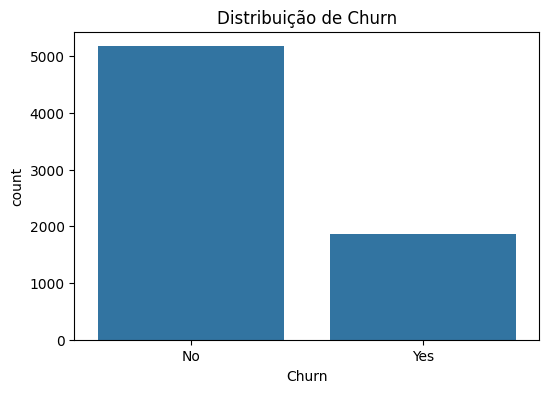

In [978]:
# Verificar a distribuição da varíavel target
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()


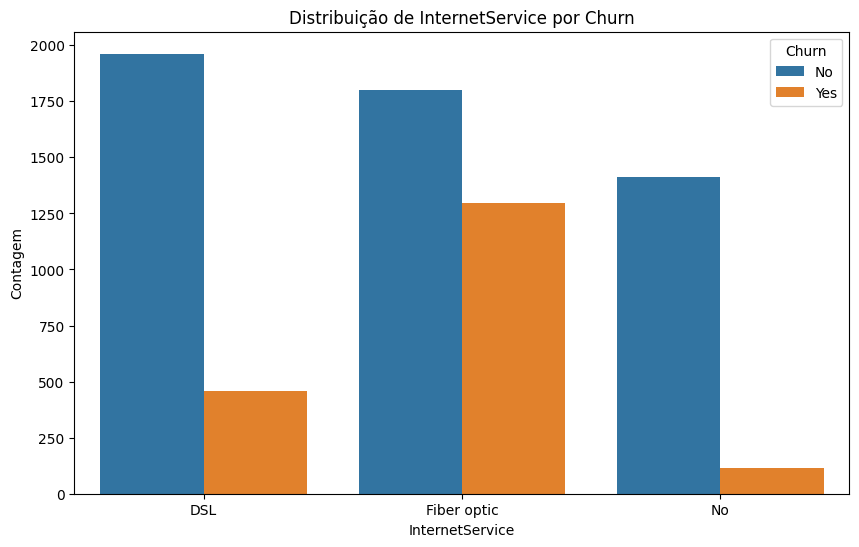

In [979]:
# Explorar as variáveis categoricas
#  Countplot de InternetService
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Distribuição de InternetService por Churn')
plt.xlabel('InternetService')
plt.ylabel('Contagem')
plt.show()

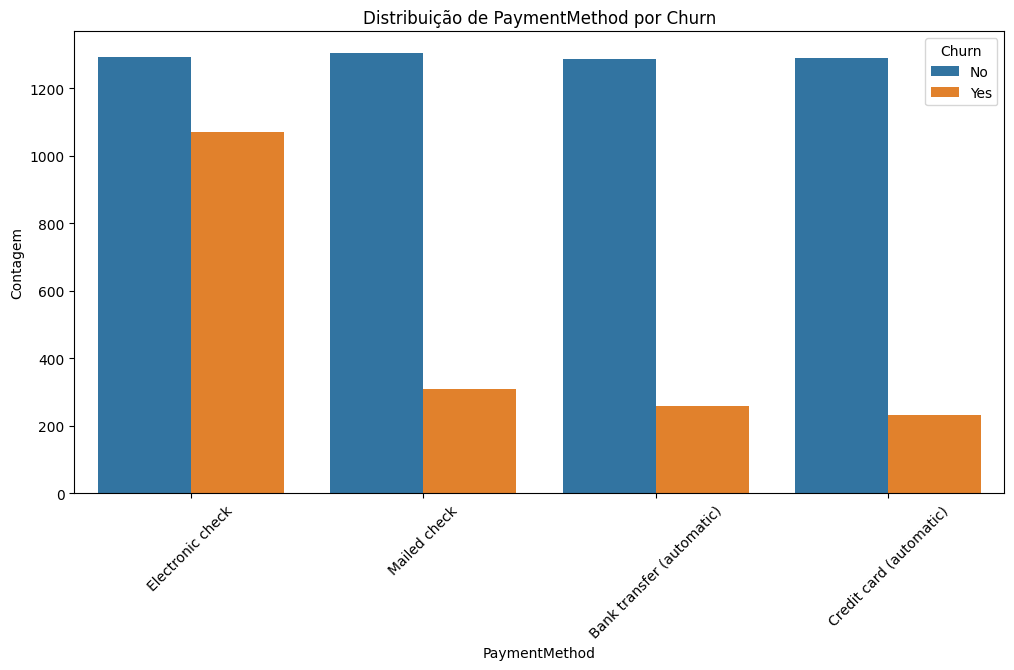

In [980]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Distribuição de PaymentMethod por Churn')
plt.xlabel('PaymentMethod')
plt.xticks(rotation=45)
plt.ylabel('Contagem')
plt.show()

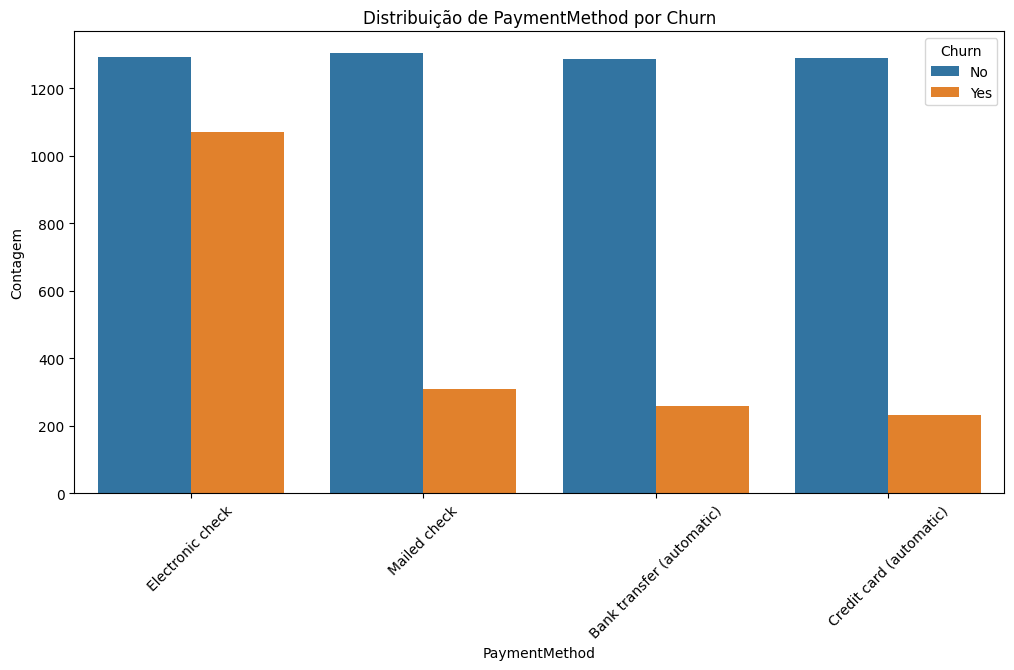

In [981]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Distribuição de PaymentMethod por Churn')
plt.xlabel('PaymentMethod')
plt.xticks(rotation=45)
plt.ylabel('Contagem')
plt.show()

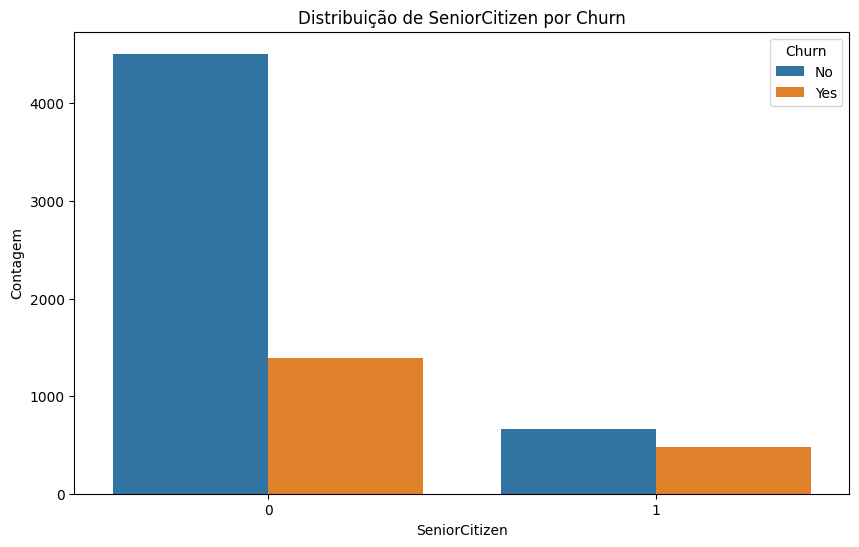

In [982]:
# Countplot de SeniorCitizen
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Distribuição de SeniorCitizen por Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Contagem')
plt.show()

In [983]:
# 4. Taxa de Churn por Categoria
# Função para calcular taxa de churn
def churn_rate_by_category(df, column):
    churn_rate = df.groupby(column)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate = churn_rate['Yes'].sort_values(ascending=False)
    print(f"\nTaxa de Churn por {column}:")
    print(churn_rate)

# Calcular taxa de churn para variáveis categóricas
churn_rate_by_category(df, 'Contract')
churn_rate_by_category(df, 'InternetService')
churn_rate_by_category(df, 'PaymentMethod')
churn_rate_by_category(df, 'SeniorCitizen')


Taxa de Churn por Contract:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Yes, dtype: float64

Taxa de Churn por InternetService:
InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Yes, dtype: float64

Taxa de Churn por PaymentMethod:
PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Yes, dtype: float64

Taxa de Churn por SeniorCitizen:
SeniorCitizen
1    0.416813
0    0.236062
Name: Yes, dtype: float64


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

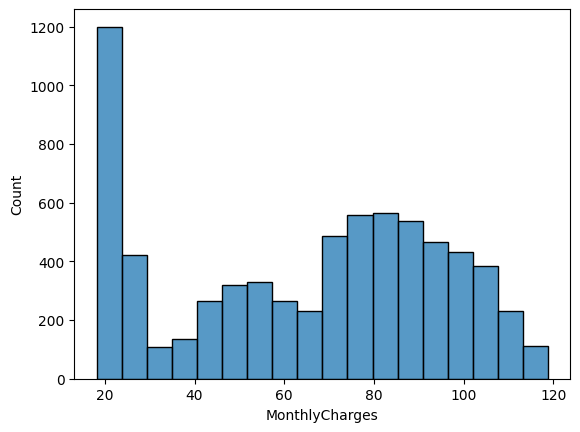

In [984]:
# Explorar as variáveis numéricas
sns.histplot(df['MonthlyCharges'])  # Numérica: curva contínua
#sns.countplot(x=df['Contract'])    # Categórica: poucas barras

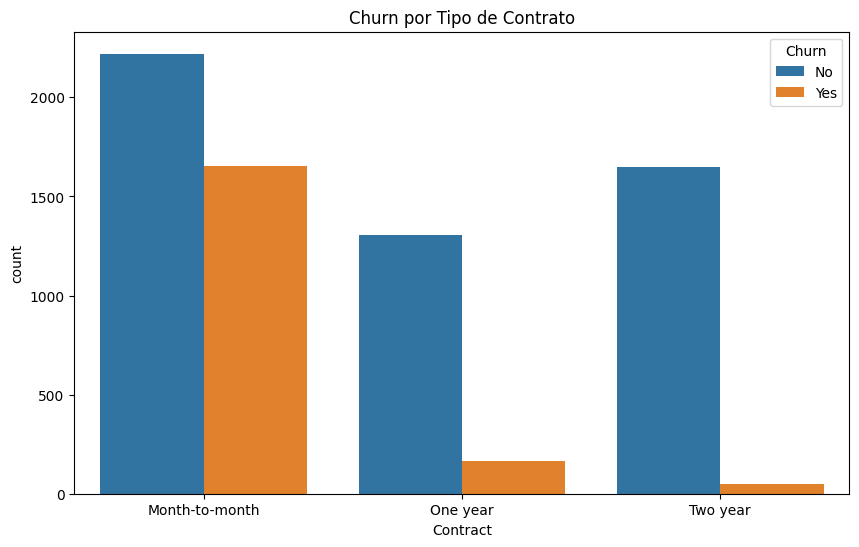

In [985]:
# Verificar o Churn por tipo de contrato (Month-to-month vs One year Contract vs Two year)
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

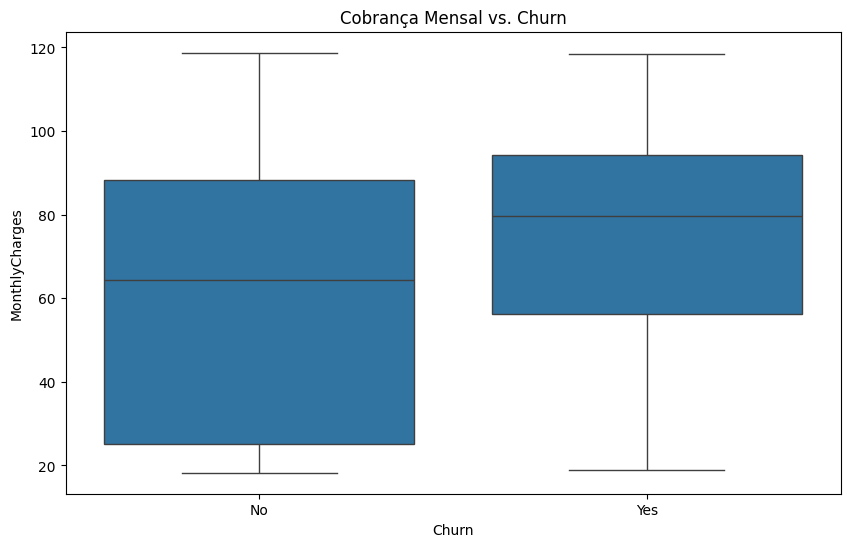

In [986]:
# Explorar variáveis numéricas Contract, InternetService, PaymentMethod, SeniorCitizen
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobrança Mensal vs. Churn')
plt.show()

<Figure size 800x600 with 0 Axes>

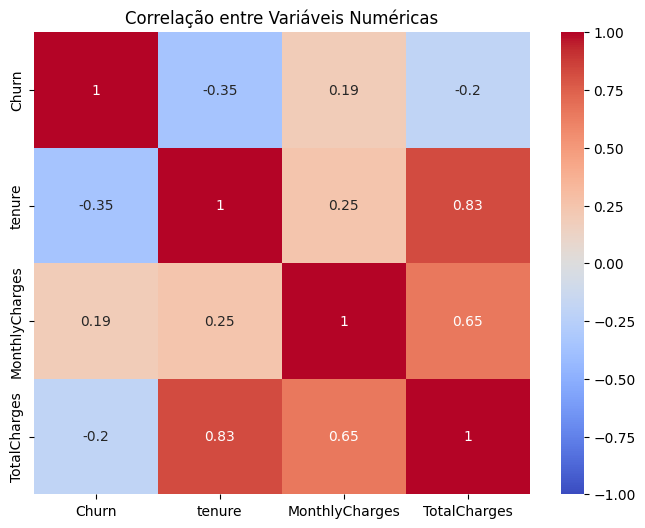

In [987]:
# 5. Correlações entre Variáveis Numéricas
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

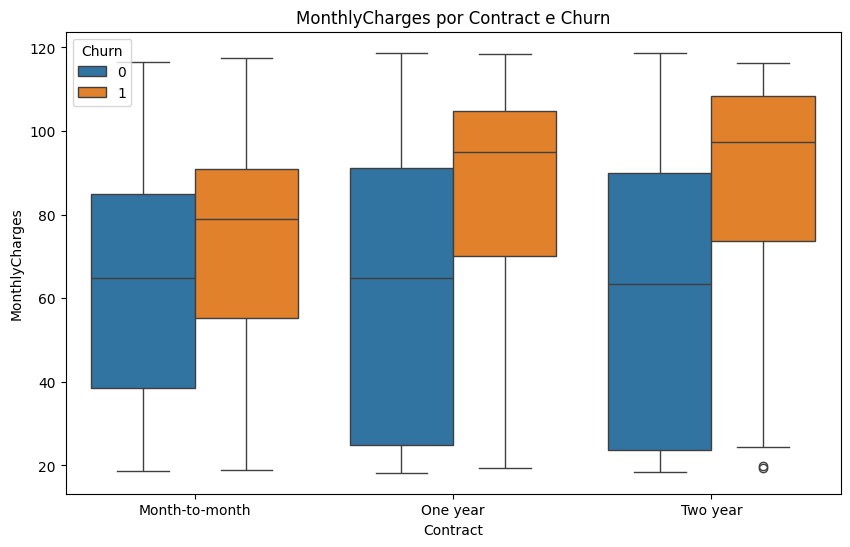

In [988]:
# 6. Interação entre Variáveis
# Boxplot de MonthlyCharges por Contract
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('MonthlyCharges por Contract e Churn')
plt.show()

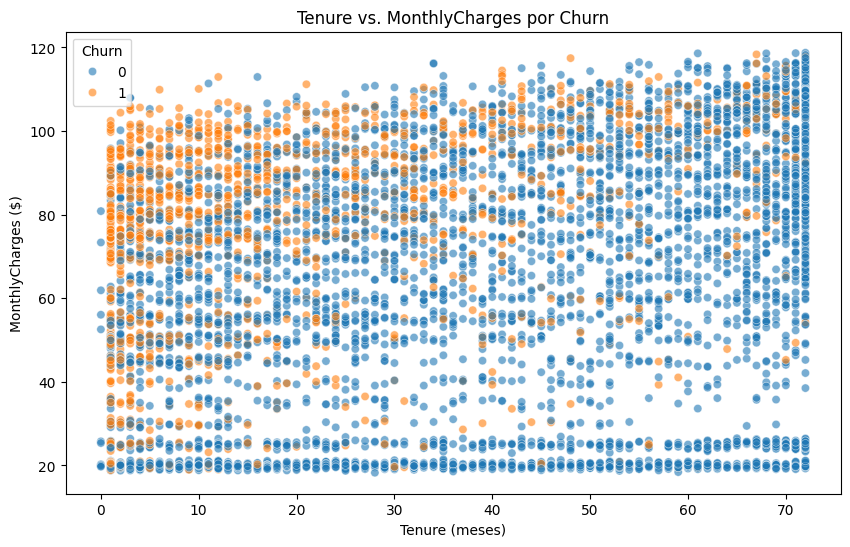

In [989]:
# Scatterplot de tenure vs. MonthlyCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Tenure vs. MonthlyCharges por Churn')
plt.xlabel('Tenure (meses)')
plt.ylabel('MonthlyCharges ($)')
plt.show()

In [990]:
#Conclusões:

# 1) Churn está desbalanceado (73% no churn vs 27% yes)

# 2) Novos clientes Churn 0 a 10 meses churnam mais. Clientes mais antigos churnam menos.

# 3) MOnthlyCharges altos churnam mais.

# 4) MonhlyCharges: Mediana mais alta indica que os clientes churnam mais por causa das altas cobranças.

# 5) Contract: Cobrança mensais tem alta proporção de churn, enquanto 2 anos tem baixa. 

# 6) InternetService: A Fiber optic tem alta taxa de churn. 

# 7) PaymentMethod: Electronic check tem alta taxa de churn.

# 8) SeniorCitizen: Idosos (1) churmais do que não idosos (0)

# 9) TotalCharges e Tenure são altamente correlacionados (80%)

# 10) MonthlyCharges por Contract: Contratos curtos com MOnthlyCharges altos têm mais churn.

# 11) Tenure vs. MonthlyCharges: Clientes novos (tenure baixo) com MonthlyCharges altos churnam mais.


In [991]:
# Função para calcular limites e contar outliers
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return lower_bound, upper_bound, outliers

# Analisar outliers
for col in df[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    lower, upper, outliers = detect_outliers(df[col])
    print(f"\n{col}:")
    print(f"Limite inferior: {lower:.2f}, Limite superior: {upper:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Exemplos de outliers: {outliers.head().values}")

# Não há necessidade de tratamento dos outliers, pois não foi detectado nenhum. 


tenure:
Limite inferior: -60.00, Limite superior: 124.00
Número de outliers: 0

MonthlyCharges:
Limite inferior: -46.02, Limite superior: 171.38
Número de outliers: 0

TotalCharges:
Limite inferior: -4688.48, Limite superior: 8884.67
Número de outliers: 0


In [992]:
import sklearn
print(sklearn.__version__)

1.5.2


In [993]:
df.drop(['customerID','PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,0,Yes,Yes,72,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,0,Yes,Yes,11,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,Yes,No,4,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [994]:
# Definir colunas numéricas e categóricas
X = df.drop('Churn', axis=1)
y = df['Churn']


# Dividir em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']


# Criar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=8684.80)),
            ('scaler', MinMaxScaler())  # Substitui StandardScaler
        ]), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan, fill_value='missing')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_cols)
    ])





Resultados dos Modelos:


Random Forest:
Melhores parâmetros: {'modelo__max_depth': 10, 'modelo__n_estimators': 100}
Acurácia: 0.81
Relatório de Classificação:
              precision    recall  f1-score   support

    No Churn       0.87      0.88      0.87      1036
       Churn       0.65      0.62      0.64       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.81      0.81      0.81      1409



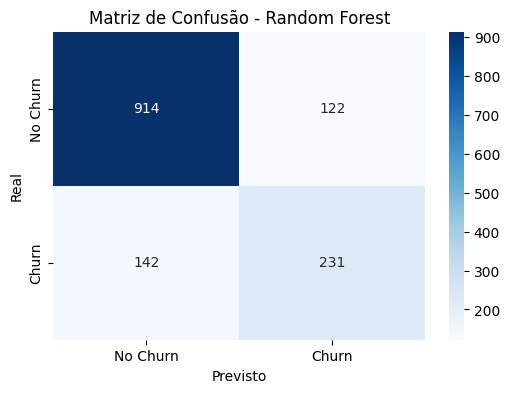

AUC-ROC para Random Forest: 0.86


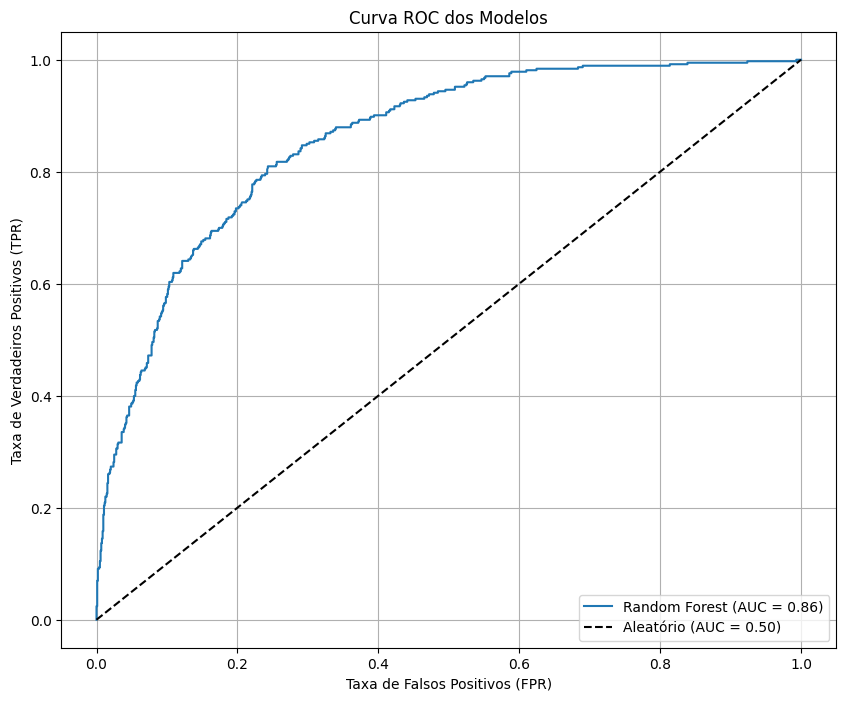


LightGBM:
Melhores parâmetros: {'modelo__bagging_fraction': 0.8, 'modelo__feature_fraction': 0.8, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__min_data_in_leaf': 20, 'modelo__n_estimators': 100, 'modelo__num_leaves': 15, 'modelo__scale_pos_weight': 1}
Acurácia: 0.82
Relatório de Classificação:
              precision    recall  f1-score   support

    No Churn       0.87      0.88      0.88      1036
       Churn       0.66      0.64      0.65       373

    accuracy                           0.82      1409
   macro avg       0.77      0.76      0.76      1409
weighted avg       0.82      0.82      0.82      1409



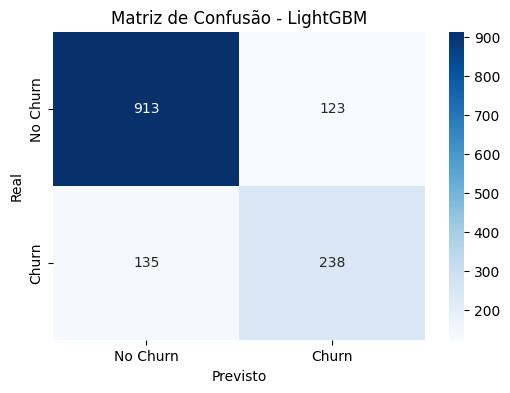

AUC-ROC para LightGBM: 0.86


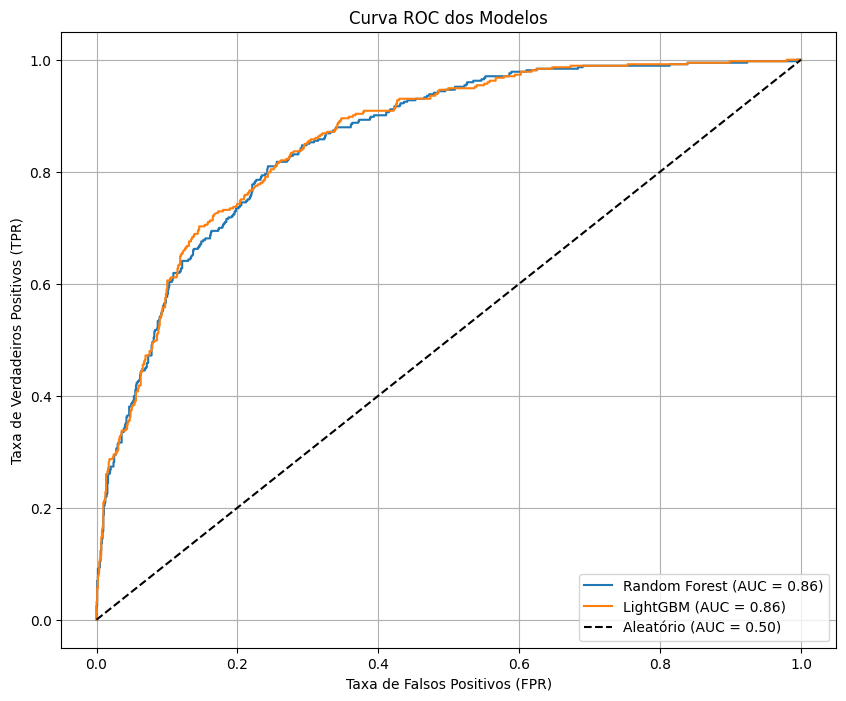


KNN:
Melhores parâmetros: {'modelo__n_neighbors': 10, 'modelo__weights': 'uniform'}
Acurácia: 0.77
Relatório de Classificação:
              precision    recall  f1-score   support

    No Churn       0.84      0.84      0.84      1036
       Churn       0.56      0.55      0.56       373

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.77      0.77      1409



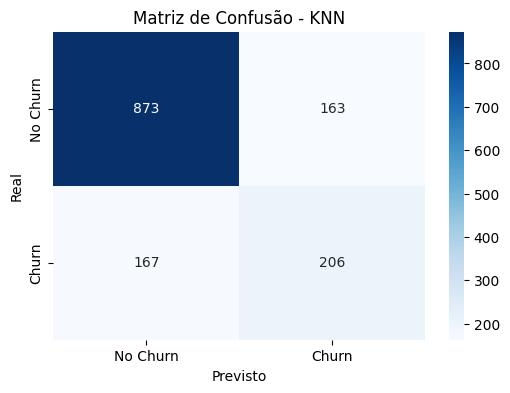

AUC-ROC para KNN: 0.80


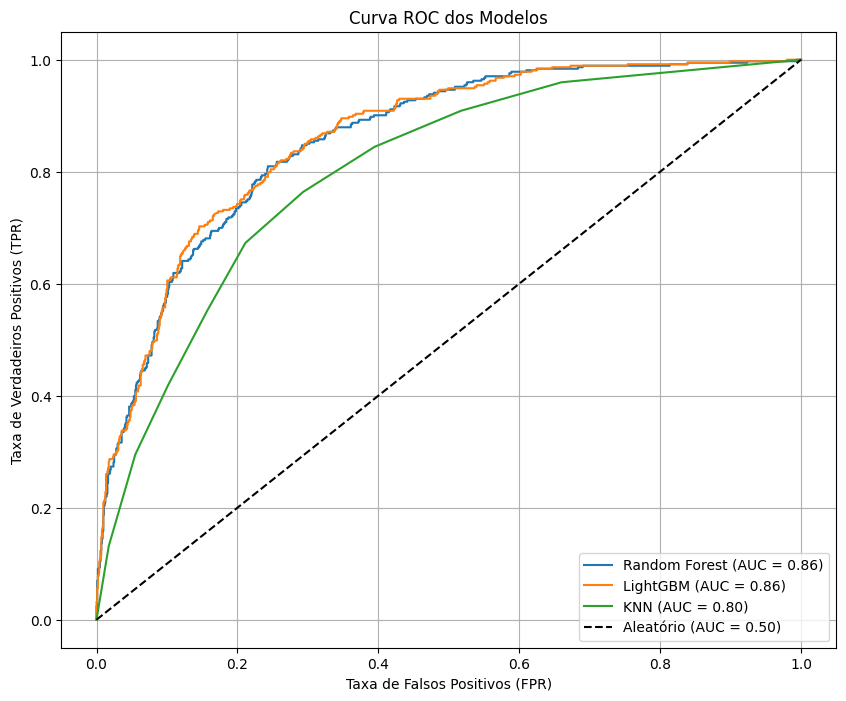


Logistic Regression:
Melhores parâmetros: {'modelo__C': 1.0, 'modelo__solver': 'lbfgs'}
Acurácia: 0.75
Relatório de Classificação:
              precision    recall  f1-score   support

    No Churn       0.92      0.72      0.81      1036
       Churn       0.51      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.81      0.75      0.76      1409



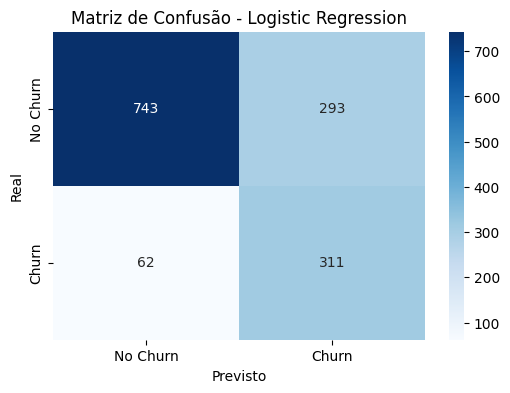

AUC-ROC para Logistic Regression: 0.86


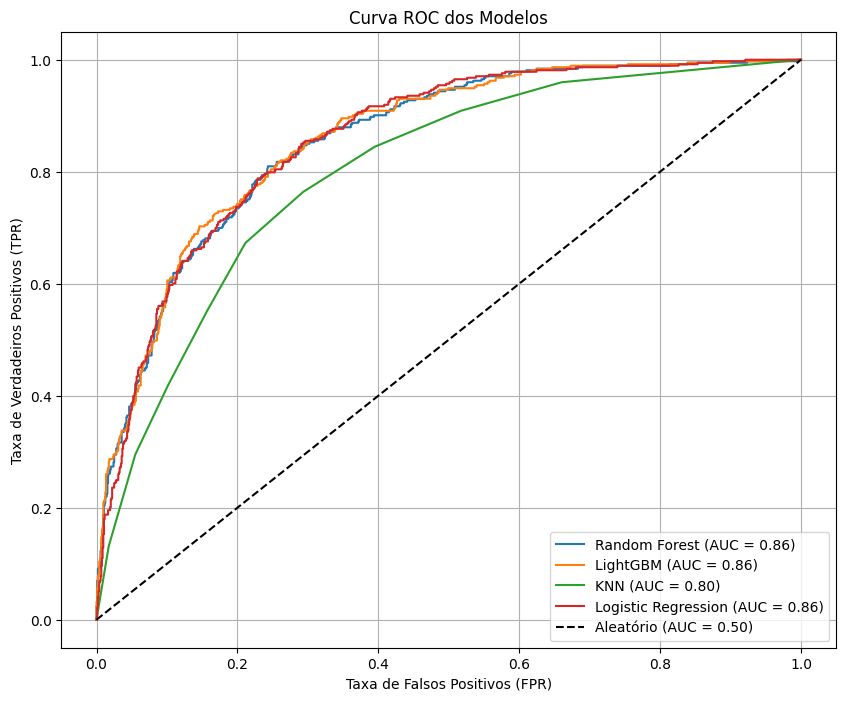


SVM Linear:
Melhores parâmetros: {'modelo__C': 1.0}
Acurácia: 0.74
Relatório de Classificação:
              precision    recall  f1-score   support

    No Churn       0.93      0.70      0.80      1036
       Churn       0.50      0.86      0.63       373

    accuracy                           0.74      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.74      0.75      1409



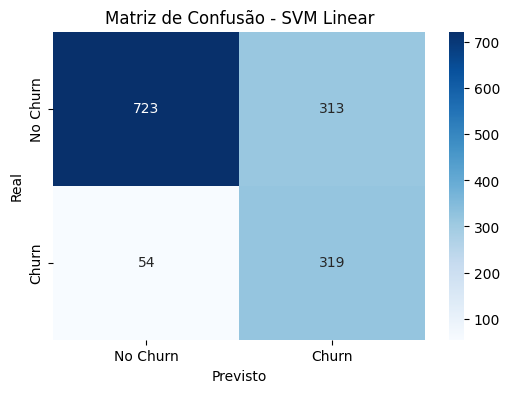

AUC-ROC para SVM Linear: 0.86


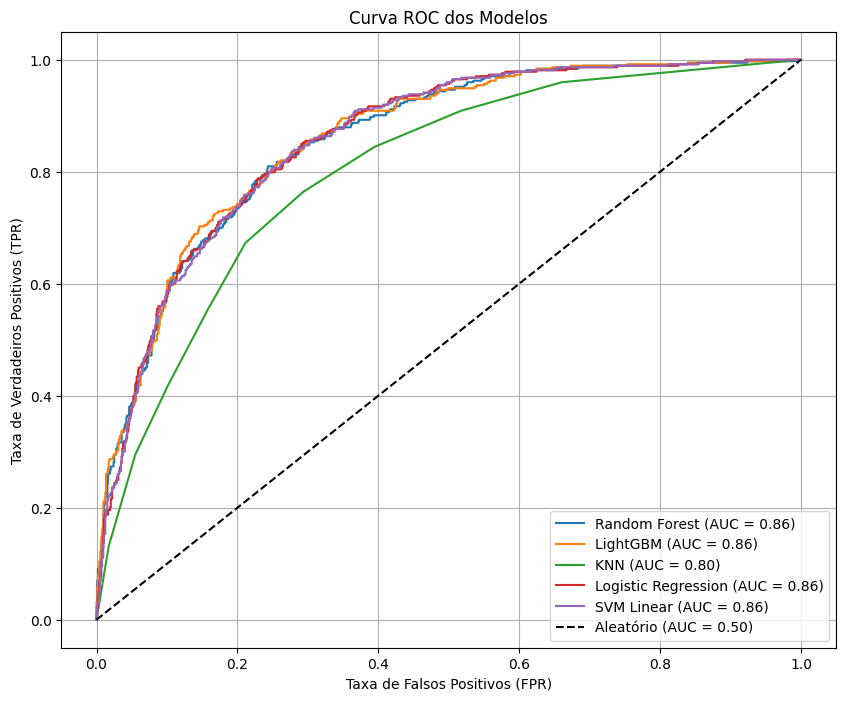

In [998]:
# --- 3. Criar Pipelines com Cinco modelos---
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'SVM Linear': SVC(random_state=42, kernel='linear', class_weight='balanced', probability=True)
}

# Parâmetros para GridSearchCV
param_grids = {
    'Random Forest': {
        'modelo__n_estimators': [100, 200],
        'modelo__max_depth': [10, 20]
    },
    'LightGBM': {  # Corrigido: chave agora é 'LightGBM'
            'modelo__n_estimators': [10, 100],  # Reduzido para menos memória
            'modelo__max_depth': [3, 6],
            'modelo__num_leaves': [15, 31],  # Limitar folhas
            'modelo__min_data_in_leaf': [20],  # Evitar árvores específicas
            'modelo__bagging_fraction': [0.8],  # Subamostragem de dados
            'modelo__feature_fraction': [0.8],  # Subamostragem de features
            'modelo__scale_pos_weight': [1, 2],
            'modelo__learning_rate': [0.01, 0.1]
    },
   'KNN': {
        'modelo__n_neighbors': [5, 10],
        'modelo__weights': ['uniform', 'distance']
    },
    'Logistic Regression': {
        'modelo__C': [0.1, 1.0],
        'modelo__solver': ['lbfgs']
    },
    'SVM Linear': {
        'modelo__C': [0.1, 1.0]
    }
}

roc_results = {}

#Treinar e avaliar
print("\nResultados dos Modelos:\n")
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocessamento', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
        ('modelo', modelo)
    ])


# GridSearchCV
    grid = GridSearchCV(pipeline, param_grids[nome], cv=3, n_jobs=1)
    grid.fit(X_train, y_train)


# Melhor modelo
    print(f"\n{nome}:")
    print(f"Melhores parâmetros: {grid.best_params_}")
    
    # Prever
    y_pred = grid.predict(X_test)
    
    # Avaliar
    acuracia = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acuracia:.2f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    # Calcular a curva ROC e AUC
    y_prob = grid.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_results[nome] = (fpr, tpr, auc_score)
    print(f"AUC-ROC para {nome}: {auc_score:.2f}")

# Plotar as curvas ROC
    plt.figure(figsize=(10, 8))
    for nome, (fpr, tpr, auc_score) in roc_results.items():
        plt.plot(fpr, tpr, label=f'{nome} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC dos Modelos')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
                  
